# Section 1 -- Introduction

It has been theoretically asserted experimentally proven in other research works that the economic, social and personal attributes of students affects their academic performance to a great extent. This project looks to give insights on how students academic performance is affected by these attributes. Findings from this analysis looks to show whether these theories apply to this set of students or not.

### Data Preparation

The dataset was gotten from the [kaggle website](kaggle.com) and link to download the dataset is found [here](https://drive.google.com/open?id=1IfJaHZYlxa5N0eePQTMIjErLW2HoU0Rx)

We will try to answer the following questions:


- How is the distribution of test scores in the dataset?

##### Personal attribute questions

- Is there a `gender` difference in scores accross all tests?
- Do students who participated in the `test preparation course` perform better than those who did not?
- Does the overall personal attributes of students have an impact on their performance?

##### Economic attribute questions
- Does parental level of education affect students performance?
- Are students performance affected by the type of lunch they get?

##### Social attrubute questions
- Does test scores vary across `race/ethnicity`?

Lets first import the necessary libraries we'll be using to perform the analysis..

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# get the current directory we're in
os.getcwd()

'C:\\Users\\ADMIN\\Desktop\\Data Science Projects\\Stutern Project'

We'll modify the above directory so that we can locate the dataset which is in a separate folder:

In [2]:
# Load the dataset using the full path
students_performance = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Data Science Projects\\Stutern Project\\Dataset\\students performance data.csv')

In [3]:
# view the first few rows of the dataset to get an insight of what it looks like

print(students_performance.shape)
students_performance.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The above output shows that there are one thousand rows and 8 columns in the `students_performance` dataset. The values seem to be correctly entered across all columns. Lets check if there are any missing values in the dataset.

In [4]:
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Three columns in the dataset contains numerical values while five columns are made up of categorical or string values. There are no null values in across all columns in the dataset. This shows that our dataset is clean and ready for analysis.

### Descriptive Analysis (Univariate Analysis)

Lets do some summary statistics of the data:

In [5]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From The above output we can deduce the following on the numeric columns:
- Among all such columns, the `reading score` column has the highest mean value, indicating that all things being equal, on the average, students score higher in reading test compararatively.
- The minimum score for this `reading test` is 17 which is higher than the least scores in both `math scores` and `writing scores`
- The standard deviation values shows that more students had scores closer to the mean in `reading test` than the other two tests

### Visualize the distribution of scores using histograms

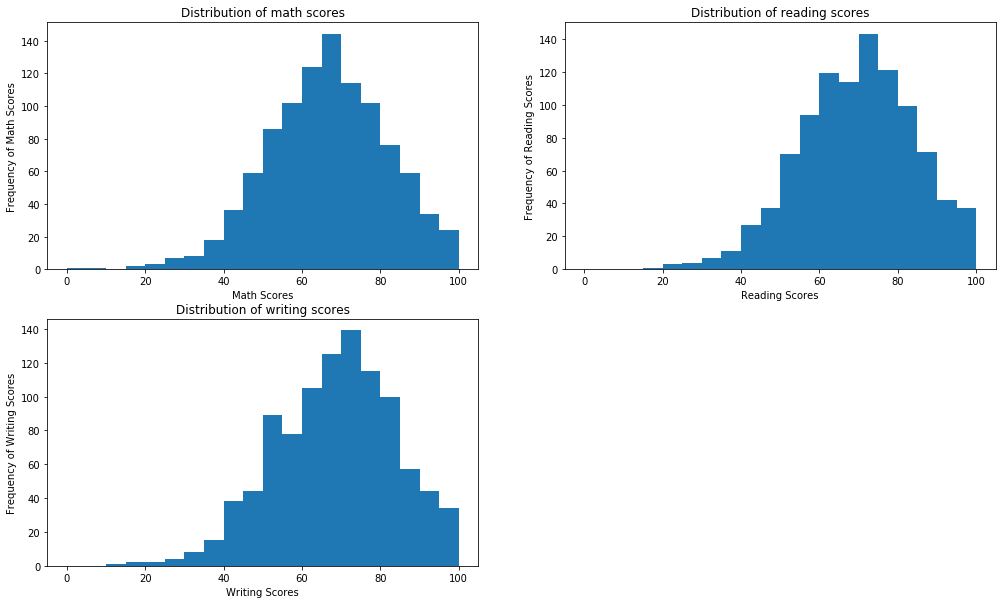

In [6]:
fig = plt.figure(figsize = (17, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


ax1.hist(students_performance['math score'], range = (0, 100), bins = 20)
ax1.set_title('Distribution of math scores')
ax1.set_xlabel('Math Scores')
ax1.set_ylabel('Frequency of Math Scores')

ax2.hist(students_performance['reading score'], range = (0, 100), bins = 20)
ax2.set_title('Distribution of reading scores')
ax2.set_xlabel('Reading Scores')
ax2.set_ylabel('Frequency of Reading Scores')

ax3.hist(students_performance['writing score'], range = (0, 100), bins = 20)
ax3.set_title('Distribution of writing scores')
ax3.set_xlabel('Writing Scores')
ax3.set_ylabel('Frequency of Writing Scores')

plt.show()

From the above histograms, we can deduce the following:

- All plots are unimodal, indicating that the most occurin scores accross all tests lies between 60-80. 
- Over 50% of students scored above 60 accross all tests
- Fewer number of students scored less than 20 in Reading test than accross the other two tests
- About 70% of scores fall between 50 - 100, suggesting that across all tests students generally performed above average.

### Lets view the boxplots

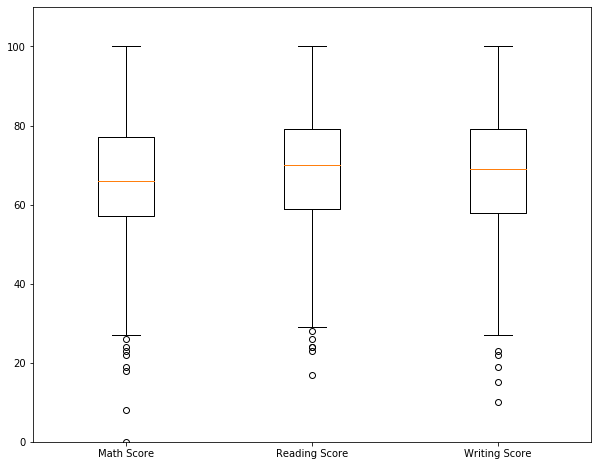

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.boxplot(students_performance[['math score', 'reading score', 'writing score']].values)
ax.set_ylim(0, 110)
ax.set_xticklabels(['Math Score', 'Reading Score', 'Writing Score'])

plt.show()

From the above boxplot, we can conclude that:

- 25% of Scores across all tests fall between 25-57
- The median score accross all tests varies slightly, with reading score having the highest median comparatively
- 75% of scores fall below 80
- There are a number of outliers in the three tests

Generally, we can conclude that scores across all tests are normally distributed and their distributions do not vary greatly from each other. 

## Analyzing Students Performance Using their Personal Attributes 
#### Gender Difference in scores Across all Tests

In [8]:
# lets see the number of males and females in the dataset
students_performance['gender'].value_counts(dropna=False)

female    518
male      482
Name: gender, dtype: int64

There are 518 females and 482 males in the dataset. Lets create a separate dataset for each gender.

In [9]:
# Only males
males_only = students_performance[students_performance['gender'] == 'male']

# Only Females
females_only = students_performance[students_performance['gender'] == 'female']

In [10]:
# create a function that generates pivot tables for grouping columns
def get_mean_pivots(index_column):
    pivot = students_performance.pivot_table(values=['math score', 'reading score', 'writing score'],
                                                    index = index_column, 
                                                    aggfunc={'math score': [np.mean, np.std],
                                                            'reading score': [np.mean, np.std],
                                                            'writing score': [np.mean, np.std]})
    
    # plot the pivot table
    chart = pivot.plot(kind = 'bar',
               y = ['math score', 'reading score', 'writing score'],
               figsize = (7, 5),
               ylim = (0, 80),
               title = 'Mean score across all test')
    
    # Place a legend to the right of the plot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    return pivot
    return chart

math score            reading score            writing score           
             mean        std          mean        std          mean        std
gender                                                                        
female  63.633205  15.491453     72.608108  14.378245     72.467181  14.844842
male    68.728216  14.356277     65.473029  13.931832     63.311203  14.113832

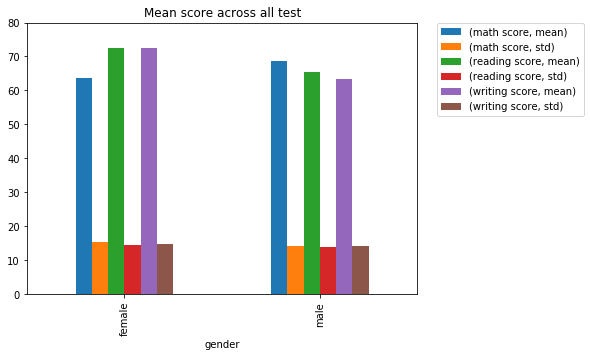

In [11]:
get_mean_pivots(students_performance['gender'])

From the above chart, we can conclude the following:

- On the average, males performed better than females in math test
- On the average, females performed better than males in both reading and writing tests
- The standard deviation values do not show much disparity amongst gender, but we can say that male students scores in `math` has a lesser spread than female students scores in maths.
- Also, the spread of scores in `reading` did not vary greatly between genders but female scores are more dispersed in `reading` than male scores.
- The standard deviation of scores in `writing` doesn't show much disperity between genders also, but a closer look at their values shows that scores of male students, (males have a lower mean value) is more clustered around the mean than the scores of female students.

#### Test preparation course completion as it affects students performance

Another personal attribute of students is their effort in completing the test preparation course. It is expected that students who completed the test preparation course have higher test scores across all subjects.

Lets get some insights on males and females who completed the test preparation course:

In [12]:
# males who completed the preparation course
males_prep_completed = males_only[males_only['test preparation course'] == 'completed']

# males who did not complete the preparation course
males_prep_none = males_only[males_only['test preparation course'] == 'none']

# Females who completed the preparation course
females_prep_completed = females_only[females_only['test preparation course'] == 'completed']

# Females who did not complete the preparation course
females_prep_none = females_only[females_only['test preparation course'] == 'none']

print('The number of males who completed the preparation course is:', len(males_prep_completed))
print('The number of males who did not complete the preparation course is:', len(males_prep_none))
print('The number of females who completed the preparation course is:', len(females_prep_completed))
print('The number of females who did not complete the preparation course is:', len(females_prep_none))

The number of males who completed the preparation course is: 174
The number of males who did not complete the preparation course is: 308
The number of females who completed the preparation course is: 184
The number of females who did not complete the preparation course is: 334


Above we see that majority of both genders did not complete the test preparation course, but more females completed the preparation course than males.

Let's see the percentage of students who completed and those who did not complete the test preparation course:

In [13]:
test_prep_percent = (students_performance['test preparation course'].value_counts() / 1000) * 100
test_prep_percent

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

Above we see that 64.2% of students did not take any preparation courses prior to the tests, while 35.8% of students participated in the preparation courses before taking the actual course.

Let's compare the actual test performance of students who particpated in preparation courses with those who did not take the preparation course:

math score            reading score             \
                              mean        std          mean        std   
test preparation course                                                  
completed                69.695531  14.444699     73.893855  13.638384   
none                     64.077882  15.192376     66.534268  14.463885   

                        writing score             
                                 mean        std  
test preparation course                           
completed                   74.418994  13.375335  
none                        64.504673  14.999661

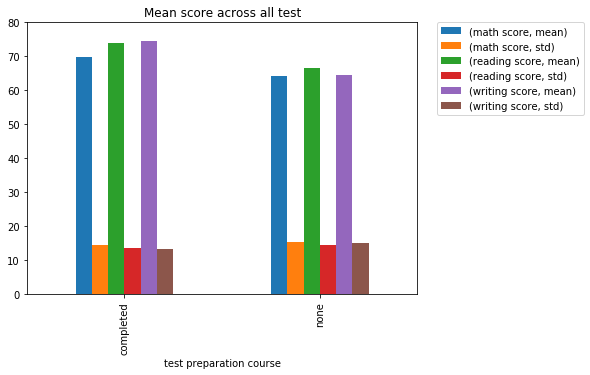

In [14]:
get_mean_pivots(students_performance['test preparation course'])

From the above table and chart, we can deduce the following:

- Students who completed the test preparation course performed better across all test than students who did not participate in the preparation course. 
- Although students who did not take the test preparation course are more in population than those who did, their test scores are still lower than those of students who took the preparation course across all subjects. This indicates that the test preparation course contributed greatly in boosting students performance across all tests.
- The standard deviation of scores for all tests depicts a lesser disperity in scores of students who completed the test preparation course than those who did not.

#### Lets compare gender and test preparation course as they affect students performance across all tests

math score            reading score             \
                                     mean        std          mean        std   
gender test preparation course                                                  
female completed                67.195652  14.244346     77.375000  12.695493   
       none                     61.670659  15.818013     69.982036  14.591730   
male   completed                72.339080  14.221817     70.212644  13.668480   
       none                     66.688312  14.049016     62.795455  13.375328   

                               writing score             
                                        mean        std  
gender test preparation course                           
female completed                   78.793478  12.240788  
       none                        68.982036  15.016497  
male   completed                   69.793103  12.992339  
       none                        59.649351  13.405737

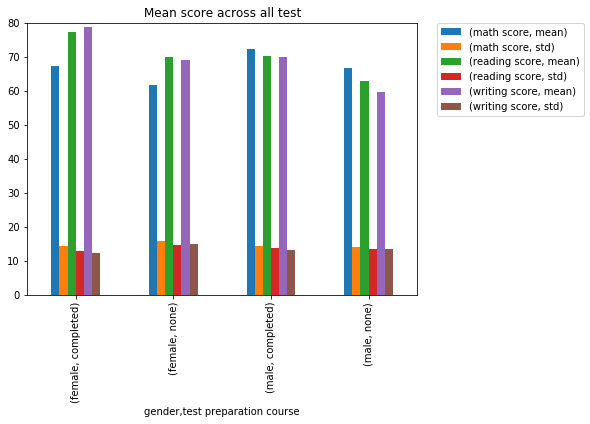

In [15]:
get_mean_pivots(students_performance[['gender', 'test preparation course']])

The following findings were made based on the above outputs:

- Females who completed the test preparation course performed better than females who did not across all tests.
- Males who completed the test preparation course performed better than males who didn't across all tests.
- Males who completed the test preparation course performed better in math than females who completed the test preparation course.
- Females who completed the test preparation course performed better in the other two subjects than males who completed the test preparation course.
- Female students who completed the `test preparation course`, have a better score and their scores are less spread out than scores of those who did not complete the `test preparation course`.
- Male students who completed the `test preparation course`, performed better on the average than those who didn't but their scores are more spread out than scores of those who did not complete the `test preparation course`except for `writing`, where the scores of those who completed the `test preparation course` was more spread than scores of those who didn't.


## Analyzing students performance based on their economic attributes

Columns that holds data related to economic attributes are the `parental level of education` and `lunch` columns. We will look at these columns and try to answer some questions related to economic traits and its effects on students performance.

#### Let's look at the `parental level of education` column:

In [16]:
parent_edu_level = (students_performance['parental level of education'].value_counts() / 1000) * 100
parent_edu_level

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

The `parental level of education` column has six unique categories, representing the highest level of education attained by parents of students in the dataset. Categories such as `some college`, `high school` and `some high school` will be recognized as lower levels of education, while categories such as `associate's degree`, `master's degree` and `bachelor's degree` will be recognized as higher levels of education.

It is assumed that students whose parents have higher levels of education will perform better than students whose parents have lower levels of education.

Let's call our pivot table function on this column:

math score            reading score             \
                                  mean        std          mean        std   
parental level of education                                                  
associate's degree           67.882883  15.112093     70.927928  13.868948   
bachelor's degree            69.389831  14.943789     73.000000  14.285250   
high school                  62.137755  14.539651     64.704082  14.132130   
master's degree              69.745763  15.153915     75.372881  13.775163   
some college                 67.128319  14.312897     69.460177  14.057049   
some high school             63.497207  15.927989     66.938547  15.479295   

                            writing score             
                                     mean        std  
parental level of education                           
associate's degree              69.896396  14.311122  
bachelor's degree               73.381356  14.728262  
high school                     62.448980  14.085907  
master's degree                 75.677966  13.730711  
some college                    68.840708  15.012331  
some high school                64.888268  15.736197

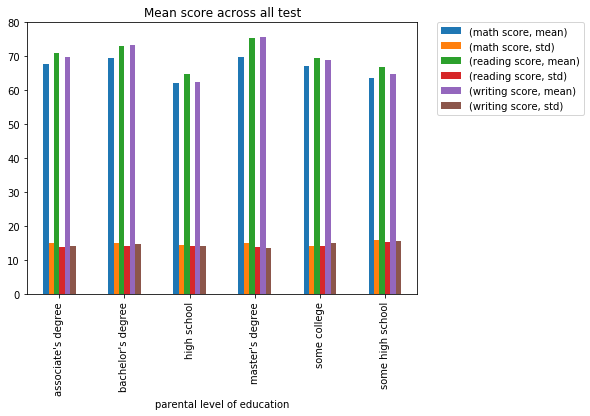

In [17]:
get_mean_pivots(students_performance['parental level of education'])

Te following findings were made from the above output:

- On the Average Students whose parents have an `associate degree` performed better in `math`, `reading` and `writing` than students whose parents highest level of education is `high school`, `some college` and `some high school`.
- On the average, students whose parents highest level of education is `master's degree` have the best performance across all subjects.
- On the average, students whose parents highest level of education is `high` school, have the least performance across all subject.
- Students whose parents highest level of education is `some high school`, have the second least performance accross all subjects and managed to perform better than students whose parents completed high school.
- On the average, Students whose parents completed `bachelor's degree` have the second best performance across all subjects.
- On the average, students whose parents highest level of education is `some college` only performed better than those whose parents highest educationla level is `high school` and `some high school` across all subjects.

This disparity in means could be as a result of the lesser representation of students whose parents highest level of education is master's and bachelor's degree, having 5.9 and 11.8 percent respectively.

Let's compare the sum of scores of students based on their parents highest level of education instead:

In [18]:
# create a dataframe of students whose parents highest level of education is master's degree
masters_data = students_performance[students_performance['parental level of education'] == "master's degree"]

# create a dataframe of students whose parents highest level of education is associate's degree
associate_data = students_performance[students_performance['parental level of education'] == "associate's degree"]

# create a dataframe of students whose parents highest level of education is bachelor's degree
bachelor_data = students_performance[students_performance['parental level of education'] == "bachelor's degree"]

# Get the sum of all categories
masters_sum = masters_data[['math score', 'reading score', 'writing score']].sum()
associate_sum = associate_data[['math score', 'reading score', 'writing score']].sum()
bachelor_sum = bachelor_data[['math score', 'reading score', 'writing score']].sum()

print("The sum of test scores for students whose parents highest level of education is master's degree is: \n", masters_sum, '\n')
print("The sum of test scores for students whose parents highest level of education is associate's degree is: \n", associate_sum, '\n')
print("The sum of test scores for students whose parents highest level of education is bachelor's degree is: \n", bachelor_sum, '\n')

The sum of test scores for students whose parents highest level of education is master's degree is: 
 math score       4115
reading score    4447
writing score    4465
dtype: int64 

The sum of test scores for students whose parents highest level of education is associate's degree is: 
 math score       15070
reading score    15746
writing score    15517
dtype: int64 

The sum of test scores for students whose parents highest level of education is bachelor's degree is: 
 math score       8188
reading score    8614
writing score    8659
dtype: int64 



From the above output we can see that students whose parents have an `associate's degree` have almost three times the sum of scores of students whose parents highest level of education is `master's degree`.

Also the sum of test scores of students whose parents highest level of education is `bachelor's degree` is almost half the sum of those whose parents have an `associate degree`.

From these, we can modify our findings and conclude that students whose parents have an `associate degree` performed best across all subjects than all other students. Also, that parents level of education affects the students performance.

##### Lets analyze the `lunch` column next:

In [19]:
lunch_type = (students_performance['lunch'].value_counts() / 1000) * 100

lunch_type

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

Students who ate the `standard`lunch make up about 64.5%, while students who ate the `free/reduced` lunch make up 34.5% of the entire students.

Let's get the mean performance of students based on their lunch type:

math score            reading score            writing score  \
                   mean        std          mean        std          mean   
lunch                                                                       
free/reduced  58.921127  15.159956     64.653521  14.895339     63.022535   
standard      70.034109  13.653501     71.654264  13.830602     70.823256   

                         
                    std  
lunch                    
free/reduced  15.433823  
standard      14.339487

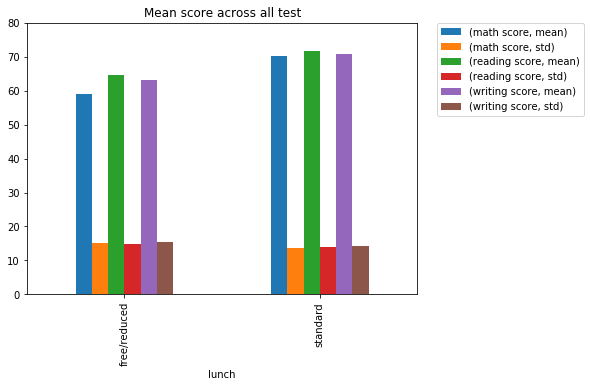

In [20]:
get_mean_pivots(students_performance['lunch'])

We make the following findings based on the above output:

- On the average, students who had `standard` lunch, performed better than students who had `free/reduced` lunch across all subjects.
- The standard deviation of scores for students who had `standard` lunch shows lesser variability than the deviation of scores of students who had `free/reduced` lunch. In other words, scores for students who had `free/reduced` lunch has a greater spread about the mean than those who had `standard` lunch.

##### Let's compare the overall effect of student's economic attributes on their academic performance

math score            reading score  \
                                               mean        std          mean   
parental level of education lunch                                              
associate's degree          free/reduced  62.610390  14.696183     67.649351   
                            standard      70.682759  14.620051     72.668966   
bachelor's degree           free/reduced  63.000000  15.003875     68.931818   
                            standard      73.189189  13.640869     75.418919   
high school                 free/reduced  54.514286  15.147337     60.214286   
                            standard      66.373016  12.349403     67.198413   
master's degree             free/reduced  61.166667  14.384976     70.291667   
                            standard      75.628571  12.813333     78.857143   
some college                free/reduced  60.126582  13.510079     65.075949   
                            standard      70.891156  13.319637     71.816327   
some high school            free/reduced  53.934426  16.095412     60.114754   
                            standard      68.440678  13.446025     70.466102   

                                                    writing score             
                                                std          mean        std  
parental level of education lunch                                             
associate's degree          free/reduced  13.635061     66.025974  13.552990  
                            standard      13.721463     71.951724  14.321861  
bachelor's degree           free/reduced  14.369538     69.227273  15.173207  
                            standard      13.767150     75.851351  13.981085  
high school                 free/reduced  14.934536     57.400000  15.266141  
                            standard      13.072120     65.253968  12.596467  
master's degree             free/reduced  13.479386     69.875000  14.362731  
                            standard      13.040983     79.657143  11.916234  
some college                free/reduced  13.957603     63.708861  14.448096  
                            standard      13.581323     71.598639  14.624833  
some high school            free/reduced  16.258432     57.622951  16.233878  
                            standard      13.861761     68.644068  14.136408

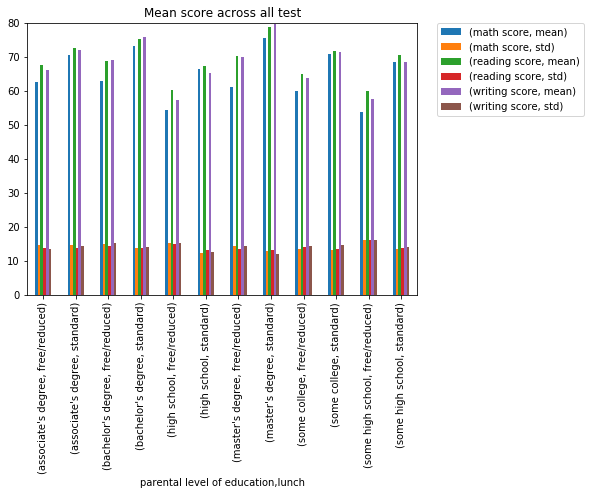

In [21]:
get_mean_pivots(students_performance[['parental level of education', 'lunch']])

The above output leads to the following findings below:

- On the average Students across all `parental levels of education` who had `standard` lunch, performed better than those who had `free/reduced` lunch across all subjects.
- On the average Students whose parents highest level of education is `master's degree` who had `standard` lunch, performed best in `math` than other students
- On the average Students whose parents had `some high school` who had `free/reduced` lunch, performed worst in `math` than other students
- On the average Students whose parents highest level of education is `master's degree` who had `standard` lunch, performed best in `reading` than other students
- On the average Students whose parents had `some high school` who had `free/reduced` lunch, performed worst in `reading` than other students
- On the average Students whose parents highest level of education is `master's degree` who had `standard` lunch, performed best in `writing` than other students
- On the average Students whose parents completed `high school` who had `free/reduced` lunch, performed worst in `writing` than other students.


## Analyzing Students Academic Performance Based on their Social Attributes

We'll use the `race/ethnicity` column which is a proxy of social attribute, to analyze the academic performance of students.

Let's first view the values in this column:

In [22]:
race_type = (students_performance['race/ethnicity'].value_counts() / 1000) * 100
race_type

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

The above output shows the make up of values the `race/ethnicity` column. Group A has the least representation with just 8.9% of students, while Group C has 31.9% of students in the dataset.

Let's get the mean performance of students in each of these groups:

math score            reading score            writing score  \
                     mean        std          mean        std          mean   
race/ethnicity                                                                
group A         61.629213  14.523008     64.674157  15.543762     62.674157   
group B         63.452632  15.468191     67.352632  15.177499     65.600000   
group C         64.463950  14.852666     69.103448  13.997033     67.827586   
group D         67.362595  13.769386     70.030534  13.895306     70.145038   
group E         73.821429  15.534259     73.028571  14.874024     71.407143   

                           
                      std  
race/ethnicity             
group A         15.468278  
group B         15.625173  
group C         14.983378  
group D         14.367707  
group E         15.113906

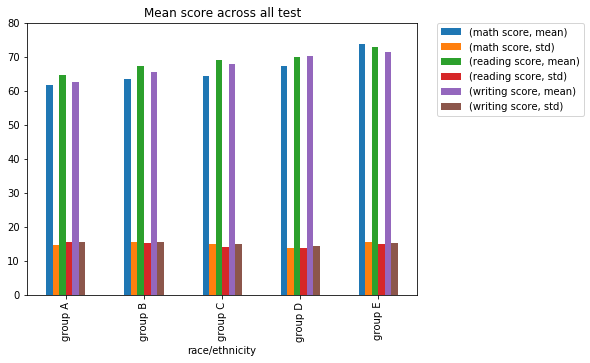

In [23]:
get_mean_pivots(students_performance['race/ethnicity'])

From the above outputs, we found that:

- On the average, students from `group E` performed best across all subjects than all the other students in the dataset.
- On the average, students from `group A` had the worst performance across all subjects than all the other students in the dataset.

## MultiVariate Analysis

##### Correlation between scores.

In [24]:
students_performance[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


The above output shows the correlation between the the three test scores. From the output displayed above, we can see the coefficient of relationships between the scores.

Let's plot these relationships in a scatter plot and make some interpretations:

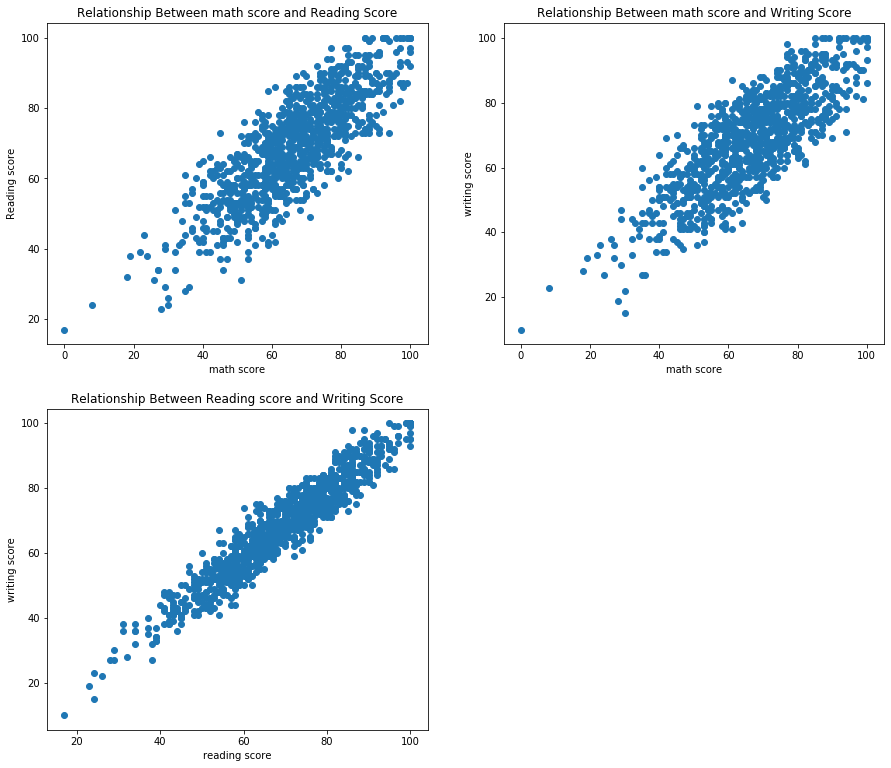

In [25]:
fig = plt.figure(figsize = (15, 13))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Math - Reading relationship
ax1.scatter(students_performance['math score'], students_performance['reading score'])
ax1.set_xlabel('math score')
ax1.set_ylabel('Reading score')
ax1.set_title('Relationship Between math score and Reading Score')

# Math - Writing relationship
ax2.scatter(students_performance['math score'], students_performance['writing score'])
ax2.set_xlabel('math score')
ax2.set_ylabel('writing score')
ax2.set_title('Relationship Between math score and Writing Score')

# Reading - Writing relationship
ax3.scatter(students_performance['reading score'], students_performance['writing score'])
ax3.set_xlabel('reading score')
ax3.set_ylabel('writing score')
ax3.set_title('Relationship Between Reading score and Writing Score')

plt.show()

The above charts shows the relationship between the test scores. We can deduce the following from the above outputs:

- There is a strong positive relationship between all test scores in the dataset.
- The relationship between `reading` and `writing` tests is strongest, having a near perfect relationship (as test scores in wrting increased, test scores in reading increased simultaneously).

## Conclusions

Conclusively, student's `race/ethnicity` affects their performance. In other words, social attributes has an impact on students performance, with students from `group E` performing better than students from other ethnic groups/races.

Also we concluded that Economic attributes of students actually affected their performance across all subjects. This is evident in the pattern of students scores according to their parental highest level of education and the kind of lunch the students had. Generally, students whose parents have higher level of education performed better than those whose parents have lower levels of education and students who could afford the standard lunch also outperformed students whose lunch was free/reduced. Thus, economic attributes such as parental level of education and lunch type are viable factors that affects the overall performance of students.

Lastly, personal attributes such as `gender` and students completion of `test preparation course` affected the overall performance of students. This is evident in the relatively higher `math scores` obtained by male students than their female counterparts and lower scores in reading and writing than female students. In other words, males performed better in courses that involved calculations than courses that didn't. Also, the `test preparation course` had an effect on students performance, as students who participated in the preparation course performed better than those who didn't. 

## Recommendations

Based on these findings and conclusions, it can be suggested females should be given extra attention and lessons in math, while males should be consider spending more time on reading and writing subjects.

Students from other ethnic groups apart from `group E` should be given special attention during lessons in order to help improve their performance, most especially students from `group A`.

`Test preparation courses` should be made compulsory for all students, as it has been shown from the findings that it helped to improve students academic performance.

Students from families with lower economic status should also be provided with standard lunch, as standard lunch has been found to also help improve students academic performance.